<a href="https://colab.research.google.com/github/aperrier004/SAT_N-Queens/blob/main/SAT_nQueens_PERRIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The N-Queens Problem
Author : Alban PERRIER

Repository project : https://github.com/aperrier004/SAT_N-Queens

Problematic : How does encoding and search evolve by increasing the size of the chessboard ?

# The Eight Queens Problem
The basic eight queens problem takes place on a 8x8 chessboard with the goal of finding the best way to place eight queens on it so that no queen would attack any other queen.

# Setup

To install pysat

In [ ]:
!wget https://www.labri.fr/perso/lsimon/option-ia/Search/Master-Class-SAT/pysat.zip
!unzip -o pysat
!mv lorensi-pysat-8625ab1d6cdf/src/* .

In [ ]:
from pysat import Solver
import time

# SAT

## Functions

In [ ]:
def generateConstraints(n):
  """"Return generated constraints definition"""
  cnf=[] # Contain every solutions
  queen=[] # COntain the queens of every solutions

  for i in range (n):
    rowQueen=[]
    for j in range (n):
      rowQueen.append ((i*n+j+1))
    queen.append(rowQueen)

  # Row and col : at least one Queen
  for i in range(n):
      queenInRow=[]
      queenInCol=[]
      for j in range(n):
          queenInRow.append(queen[i][j])
          queenInCol.append(queen[j][i])
      cnf.append(queenInRow)
      cnf.append(queenInCol)

  # Row/Col : one Queen
  for i in range (n):
      for j in range(n):
          for k in range(j+1,n): #Col
            cnf.append([-queen[i][j],-queen[i][k]])

  for i in range (n):
      for j in range(n):
          for k in range(i+1,n): #Row
            cnf.append([-queen[i][j],-queen[k][j]])

  # Diagonal : one Queen for each
  for i in range (n):
      for j in range (n):
        for k in range (1,n):
          if (i+k<n and j+k<n):
            cnf.append([-queen[i][j],-queen[i+k][j+k]])
          if (i-k>=0 and j+k<n):
            cnf.append([-queen[i][j],-queen[i-k][j+k]])
  return cnf

In [ ]:
def print_chessboard(solution, n):
  """"Print the chessboard with the Queens placed on it"""
  queen=[]
  for i in range (n):
    rowQueen=[]
    for j in range (n):
      rowQueen.append (0)
    queen.append(rowQueen)

  for i in solution:
      if i >0:
        x=i
        queen[(x-1)//n][(x-1)%n]="Q"
      else:
        x=int(-i)
        queen[(x-1)//n][(x-1)%n]="-"

  for i in queen :
    print (i)

In [ ]:
def solve_n_queens(n):
  """"Return the solution of the Solver"""
  cnf = generateConstraints(n)

  s=Solver()
  for i in cnf:
    s.addClause(i)
  s.buildDataStructure() # Print the building time
  s.solve() # Print the nbvar and clauses
  s.printFinalStats() # Print detailled info

  solution = s.finalModel

  return solution, s._nbvars, len(s._clauses), s._time0

## Solutions

### 8-Queens problem

In [ ]:
# 8-Queens problem
solution, nbvar, clauses, cpu_time = solve_n_queens(8)

print_chessboard(solution, 8)

c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
c cpu time: 0.03s (search=0.02s)
c conflicts: 24 (1278/s)
c unary clauses: 0
c restarts: 1
c propagations: 395 (21045/s)
c Moved Watches: 328
c Inspected Watches: 2109
c VSIDS rescaling: 0
c Avg Decision Levels: 15
c Avg Trail Size: 59
c Resolutions: 173 (7.21/confl)
['-', '-', '-', 'Q', '-', '-', '-', '-']
['-', 'Q', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', 'Q', '-']
['-', '-', 'Q', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', 'Q', '-', '-']
['-', '-', '-', '-', '-', '-', '-', 'Q']
['-', '-', '-', '-', 'Q', '-', '-', '-']
['Q', '-', '-', '-', '-', '-', '-', '-']


The 8-Queens problem is easily solved and here we give one of the possible solutions that exists. The SAT solver is pretty good as solving it and we can see that the used cpu time is very low with 0.02s (runned on Colab without GPU).

### Expanding the problem to "N" QUeens on an NxN chessboard

First, we can explore the running time results

In [ ]:
input_size = [8,25,50,100,150]
tab_sol = []
tab_nbvar = []
tab_clauses = []
tab_time = []

for i in input_size:
  print("\n"+str(i)+"-Queens")
  solution, nbvar, clauses, cpu_time = solve_n_queens(i)
  t=time.time()
  tab_sol.append(solution)
  tab_nbvar.append(nbvar)
  tab_clauses.append(clauses)
  tab_time.append(abs(round(t-cpu_time,2)))


8-Queens
c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
c cpu time: 0.02s (search=0.01s)
c conflicts: 24 (1612/s)
c unary clauses: 0
c restarts: 1
c propagations: 395 (26538/s)
c Moved Watches: 328
c Inspected Watches: 2109
c VSIDS rescaling: 0
c Avg Decision Levels: 15
c Avg Trail Size: 59
c Resolutions: 173 (7.21/confl)

25-Queens
c Building data structures in 0.03s
c Ready to go with 625 variables and 24850 clauses
c 100 conflicts, 3749 propagations, 1 restarts, 0/0 unaries, 170 decisions depth, 576 propagation depth, 1120 resolutions
c cpu time: 0.55s (search=0.42s)
c conflicts: 156 (370/s)
c unary clauses: 0
c restarts: 2
c propagations: 6289 (14939/s)
c Moved Watches: 4915
c Inspected Watches: 50491
c VSIDS rescaling: 0
c Avg Decision Levels: 170
c Avg Trail Size: 579
c Resolutions: 1886 (12.09/confl)

50-Queens
c Building data structures in 0.26s
c Ready to go with 2500 variables and 203450 clauses
c 100 conflicts, 7380 propagations, 1 resta

# Interpretations

## Exploring the running time

The N-queens problem has many well known solutions that use certain patterns and symmetries that were found to repeatedly occur in valid arrangements. By definition, work with SAT and employing a SAT-solver is not optimal as the figure below shows. Indeed, while there always remains a possibility that the solver will be able to encounter a valid assignment relatively early, even in the most optimistic scenario the processing time is increasing rapidly.

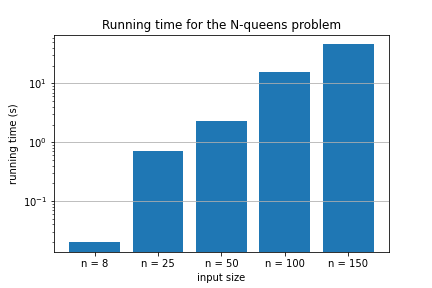

### Code

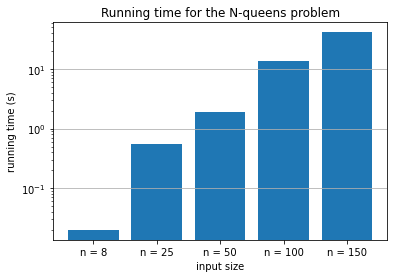

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
n_queens = []
for i in input_size:
  n_queens.append("n = " + str(i))

ax.bar(n_queens,tab_time)
plt.xlabel('input size')
plt.ylabel('running time (s)')
ax.set_yscale('log')
ax.grid(axis='y')
ax.set_title("Running time for the N-queens problem")

fig.savefig("running_time.png")
plt.show()


## Exploring the variables and clauses

As we can see in the figure below, the encoding of the N-Queen problem using SAT involves introducing numerous variables and connecting them by a high number of constraints. In particular, the number of clauses rises quadratically, as expected due to the constraints.

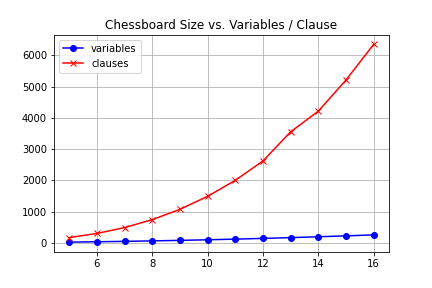

### Code

In [ ]:
input_size2 = list(range(5, 17))

tab_sol = []
tab_nbvar = []
tab_clauses = []
tab_time = []

for i in input_size2:
  print("\n"+str(i)+"-Queens")
  solution, nbvar, clauses, cpu_time = solve_n_queens(i)
  t=time.time()
  tab_sol.append(solution)
  tab_nbvar.append(nbvar)
  tab_clauses.append(clauses)
  tab_time.append(abs(round(t-cpu_time,2)))


5-Queens
c Building data structures in 0.00s
c Ready to go with 25 variables and 170 clauses
c conflicts: 0

6-Queens
c Building data structures in 0.00s
c Ready to go with 36 variables and 302 clauses
c cpu time: 0.01s (search=0.00s)
c conflicts: 7 (1987/s)
c unary clauses: 0
c restarts: 1
c propagations: 117 (33213/s)
c Moved Watches: 88
c Inspected Watches: 485
c VSIDS rescaling: 0
c Avg Decision Levels: 8
c Avg Trail Size: 34
c Resolutions: 51 (7.29/confl)

7-Queens
c Building data structures in 0.00s
c Ready to go with 49 variables and 490 clauses
c conflicts: 0

8-Queens
c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
c cpu time: 0.02s (search=0.01s)
c conflicts: 24 (1660/s)
c unary clauses: 0
c restarts: 1
c propagations: 395 (27326/s)
c Moved Watches: 328
c Inspected Watches: 2109
c VSIDS rescaling: 0
c Avg Decision Levels: 15
c Avg Trail Size: 59
c Resolutions: 173 (7.21/confl)

9-Queens
c Building data structures in 0.00s
c Ready to go wit

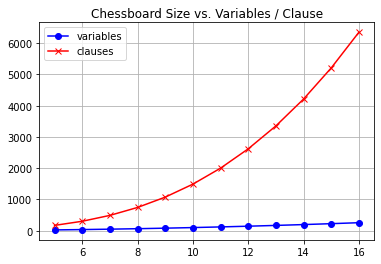

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.plot(input_size2, tab_nbvar, "-bo", label='variables')
plt.legend()
plt.plot(input_size2, tab_clauses, "-rx", label='clauses')
plt.legend()
ax.grid()
ax.set_title("Chessboard Size vs. Variables / Clause")

fig.savefig("variable_clause.png")
plt.show()

# Using SAT to fin EVERY possible solutions

The goal of this section was to find every solutions possible of the n-queens problem using SAT

I've created a function which takes as a parameter `previous_constraints` which contains a list of the solution that was found previously. It will be add up to the constraints to force the Solver to find another solution.

In [ ]:
def generateConstraintsForAllSolutions(n, previous_constraints):
  """"Return generated constraints definition"""
  cnf=[] # Contain every solutions
  queen=[] # Contain the queens of every solutions

  for i in range (n):
    rowQueen=[]
    for j in range (n):
      rowQueen.append ((i*n+j+1))
    queen.append(rowQueen)

  # Row and col : at least one Queen
  for i in range(n):
      queenInRow=[]
      queenInCol=[]
      for j in range(n):
          queenInRow.append(queen[i][j])
          queenInCol.append(queen[j][i])
      cnf.append(queenInRow)
      cnf.append(queenInCol)

  # Row/Col : one Queen
  for i in range (n):
      for j in range(n):
          for k in range(j+1,n): #Col
            cnf.append([-queen[i][j],-queen[i][k]])

  for i in range (n):
      for j in range(n):
          for k in range(i+1,n): #Row
            cnf.append([-queen[i][j],-queen[k][j]])

  # Diagonal : one Queen for each
  for i in range (n):
      for j in range (n):
        for k in range (1,n):
          if (i+k<n and j+k<n):
            cnf.append([-queen[i][j],-queen[i+k][j+k]])
          if (i-k>=0 and j+k<n):
            cnf.append([-queen[i][j],-queen[i-k][j+k]])

  # Add constraints corresponding to previous solutions
  for i in previous_constraints:
    cnf.append(i)

  return cnf

This second function solve the problem and use a while True in order to count the number of solutions. The close condition rises when the solver can't find any solution to the problem any more.

In [ ]:
def nb_solutions(n, debug = False):
  """"Return the number of solutions"""
  nb_sol = 0
  previous_constraints = []
  
  # Loop until there's no solution to find anymore
  while True:
    # Generated constraints with the previous one
    cnf = generateConstraintsForAllSolutions(n, previous_constraints)

    s=Solver()
    for i in cnf:
      s.addClause(i)
    s.buildDataStructure() # Print the building time
    result = s.solve() # Print the nbvar and clauses

    # if UNSAT, then stop
    if result == s._cst.lit_False:
      print("Every solutions have been found")
      return nb_sol

    solution = s.finalModel

    # building new constraint with the newest solution found
    constraints = []
    for i in solution:
        # Just to give the positions of the queens in the solution
        if(i>0):
          # Negative value to make it a constraint
          constraints.append(-i)

    previous_constraints.append(constraints)

    nb_sol = nb_sol + 1

    # To print the solutions on the chessboard
    if debug:
      print(nb_sol)
      print_chessboard(solution, 8)

  return nb_sol

**/!\** To make it work, I've commented the line 276 in the_reportSearch() function in `pysat.py` and deleted the printing of `una` line 273. **/!\**

In [ ]:
# 8-Queens problem
nb_sol = nb_solutions(8, debug=True)

c Building data structures in 0.00s
c Ready to go with 64 variables and 744 clauses
1
['-', '-', '-', 'Q', '-', '-', '-', '-']
['-', 'Q', '-', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', 'Q', '-']
['-', '-', 'Q', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', 'Q', '-', '-']
['-', '-', '-', '-', '-', '-', '-', 'Q']
['-', '-', '-', '-', 'Q', '-', '-', '-']
['Q', '-', '-', '-', '-', '-', '-', '-']
c Building data structures in 0.00s
c Ready to go with 64 variables and 745 clauses
2
['-', '-', '-', '-', 'Q', '-', '-', '-']
['-', 'Q', '-', '-', '-', '-', '-', '-']
['-', '-', '-', 'Q', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', 'Q', '-']
['-', '-', 'Q', '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', '-', '-', 'Q']
['-', '-', '-', '-', '-', 'Q', '-', '-']
['Q', '-', '-', '-', '-', '-', '-', '-']
c Building data structures in 0.00s
c Ready to go with 64 variables and 746 clauses
3
['-', '-', 'Q', '-', '-', '-', '-', '-']
['-', '-', '-', '-', 'Q', '-', '-', '-']
['-'

In [ ]:
print("Il y a " + str(nb_sol) + " solutions pour le problèmes des 8-reines.")

Il y a 92 solutions pour le problèmes des 8-reines.
